#YOLOv5를 이용한 딸기 수과 갯수확인

> ### 구글드라이브 **마운트(연결)** 필수
> => 파일을 가져오고 실행하기 위함, 실행시마다 일회성으로 연결됨
> ### 빠르고 정확한결과를 위해 colab에 **GPU 사용 설정** 필요
> => YOLOv5는 GPU를 통해 수과찾는 연산을 할 수 있음
>
---
> * 구글드라이브 상에서 실행되기 때문에, Detection을 수행할 **이미지는 구글드라이브에 업로드** 되어 있어야 합니다.
>
> * **작년 Red fruit 데이터만으로 훈련**되었기 때문에 다른 생육단계(green, pink)의 수과는 잘 안될 수 있습니다.  

## SJU_KNU_achene_count 바로가기 만들기
> * 현재 SJU_KNU_achene_count는 최초 실행시 공유문서함에 있으므로 Mydrive로 바로가기 생성해주는것이 필요
>
> 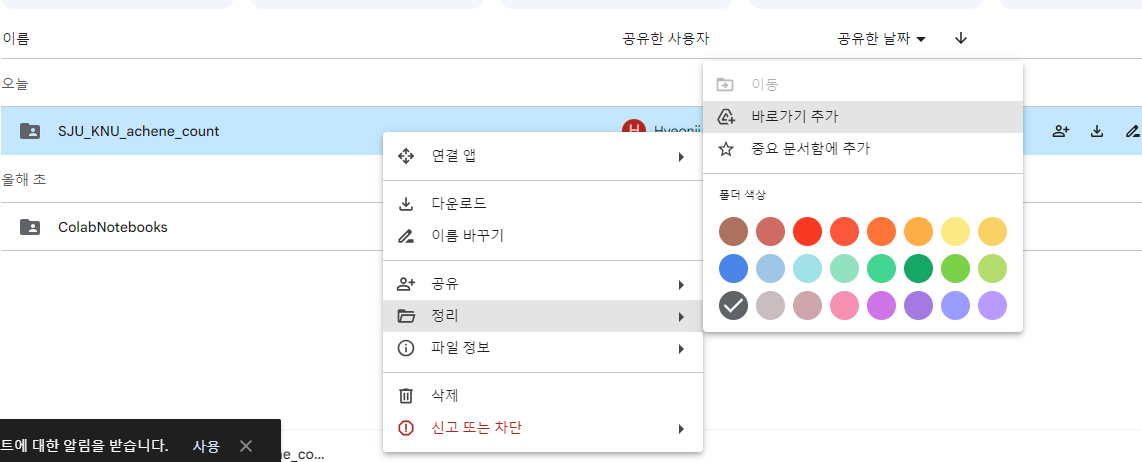

> 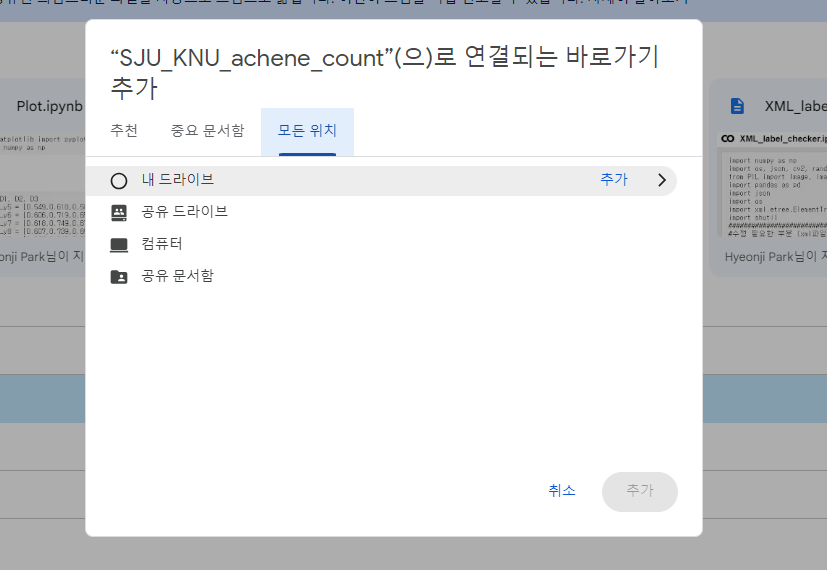

## 딸기 이미지 가이드
> * YOLOv5는 딸기가 이미지상에서 꽏 찬 상태인 데이터로만 훈련되었기 때문에 딸기가 전체 이미지중 작게 나왔을 경우 Detection을 잘 못함 <br>
> * 따라서 원활한 detection을 위해서는 Crop 작업 필수
>
> 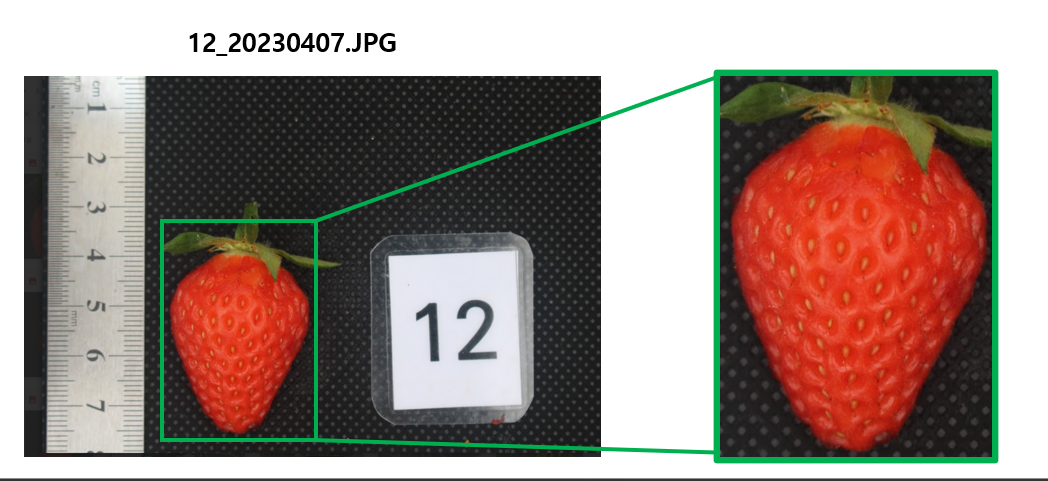

In [1]:
###### 1 (필수 실행) ###############
# 구글드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
####### 2 (필수 실행) ##############
%cd /content/drive/MyDrive/SJU_KNU_achene_count/yolov5
%pip install -qr requirements.txt comet_ml  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-210-gdd10481 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


## GPU 연결하는법
> * Colab에서는 일정시간 무료로 GPU 사용이 가능합니다. <br>
>
> * 다만 유료결제를 안했기 때문에, 조금 느릴수도 있고,, 앞으로 몇시간 쓸수있는지도 안알려주고,, 실행시간이 좀 랜덤이라는게 단점 이지만, 결제는 추천x (=> 확인하고 간단히 분석하기에는 충분)<br>
> ---
> * GPU 사용설정 참고:
> * 런타임유형변경 - 하드웨어가속기 - T4선택
> *  https://hichoe95.tistory.com/29



> ```
>  !nvidia-smi
> ```
> 코드 실행시 다음과 같이 출력될 경우 GPU 사용이 가능한 상태
> 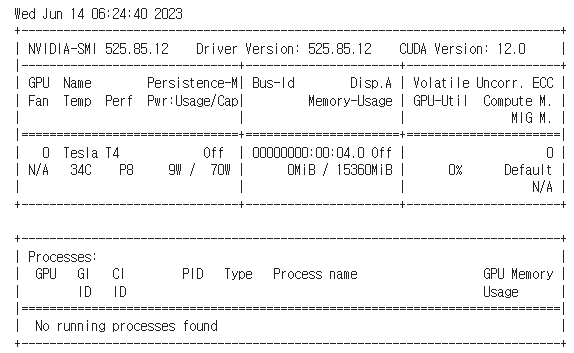


> * 만약 "/bin/bash: line 1: nvidia-smi: command not found"이 뜬다면 다시 설정 <br>
>
>

In [5]:
########## 3 (필수 실행 & 결과 제대로 나오는지 확인) ############
#GPU 확인
!nvidia-smi

Wed Aug 16 03:50:32 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8     9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## 파일이 들어있는 폴더명 확인 & 지정
> * 현재 YOLOv5는 Google drive내, 편의를 위해 SJU_KNU_Achene_count라는 폴더 안에있는 데이터만 쓰도록 했습니다. <br>
> * 모델에게는 확인할 이미지가 들어있는 폴더의 위치 명시 필요 <br>
> * 예시로 SJU_KNU_achene_count에 test 폴더 안 2022군위수확안 2023.04.07 폴더속 Red를 확인하려면
> ```
> folder_name ="2022군위수확/2023.04.07/Red"
> ```
> * 혹은 Pink를 확인하고 싶으면
> ```
> folder_name ="2022군위수확/2023.04.07/Pink"
> ```
>
----
> * 만약 폴더명 잘못입력 혹은 이미지가 들어있는 폴더가 아닌 폴더가 한층 더있는경우(2023.04.07까지만 입력 등..) 아래와 같은 오류 발생 <br>
> * 이경우 오타나 이미지 파일 외 다른거 없는지 확인 필요
>
>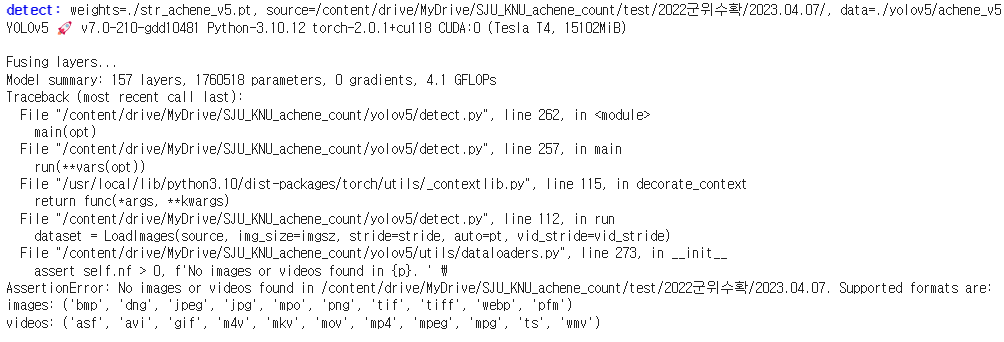


In [6]:
########### 4 (필수) #####################
# 이미지가 들어있는 폴더명 입력 #########################
folder_name = "test/2021_achene"

## Hide-labels 옵션
> * 모델이 Detection한 label이름과 모델의 confidence 값들 정보를 결과 이미지에서 숨길 수 있음
> 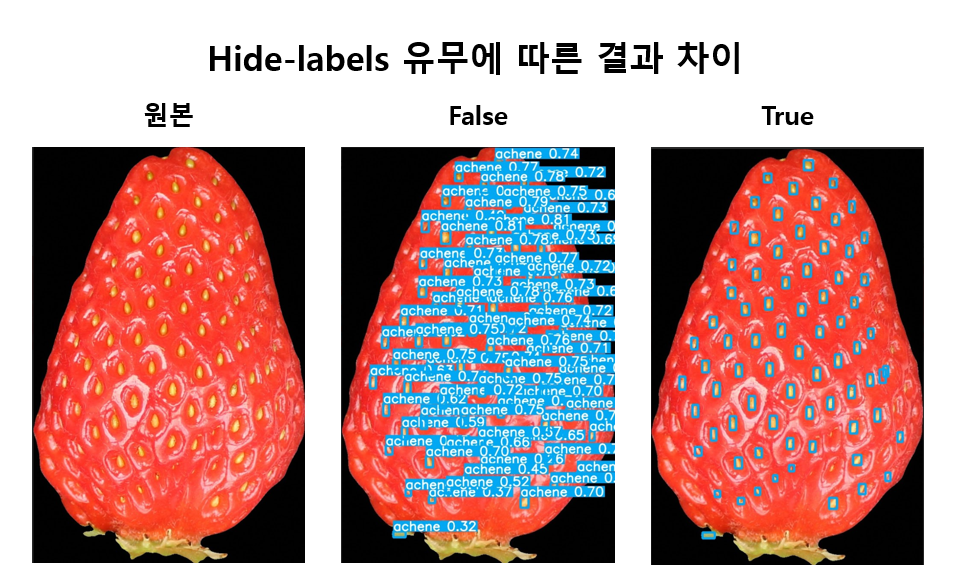

In [ ]:
# detection 실행코드: label 보임
!python detect.py  --source /content/drive/MyDrive/SJU_KNU_achene_count/"{folder_name}"

In [ ]:
# detection 실행코드:  hide label기능 사용
!python detect.py --hide-labels --source /content/drive/MyDrive/SJU_KNU_achene_count/"{folder_name}"

## Detection 결과는 Detection_results폴더에 저장됨
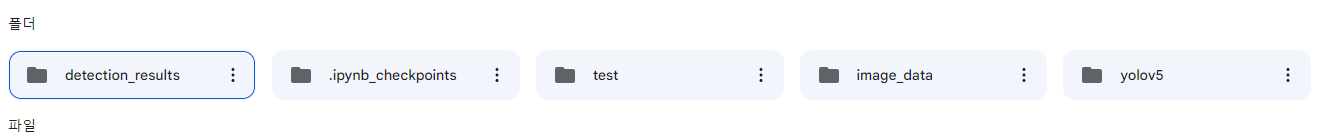

In [33]:
!git remote add origin https://github.com/HyeonJi-P/achene_for_KNU.git
!git push -u origin main

error: src refspec main does not match any
error: failed to push some refs to 'https://github.com/HyeonJi-P/achene_for_KNU.git'
